In [ ]:
pip install scanpy


In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
adata = sc.datasets.pbmc3k()


  0%|          | 0.00/5.58M [00:00<?, ?B/s]

DATASET: It is a Peripheral Blood Mononuclear Cells (PBMC) scRNA-seq data of around 2700 cells.

One-dimensional: Contains only gene expression (RNA counts).

In [3]:
adata
adata.obs.head()

""
index
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [4]:
adata.var.head()

,gene_ids
index,
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945


In [5]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
print("Mitochondria genes have been marked:")
print(adata.var["mt"].value_counts())  # How many mitochondria genes present?


Mitochondria genes have been marked:
mt
False    32725
True        13
Name: count, dtype: int64


In [6]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
adata.obs.head()


,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
index,,,,
AAACATACAACCAC-1,781,2421.0,73.0,3.015283
AAACATTGAGCTAC-1,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,3149.0,28.0,0.889171
AAACCGTGCTTCCG-1,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,981.0,12.0,1.223242


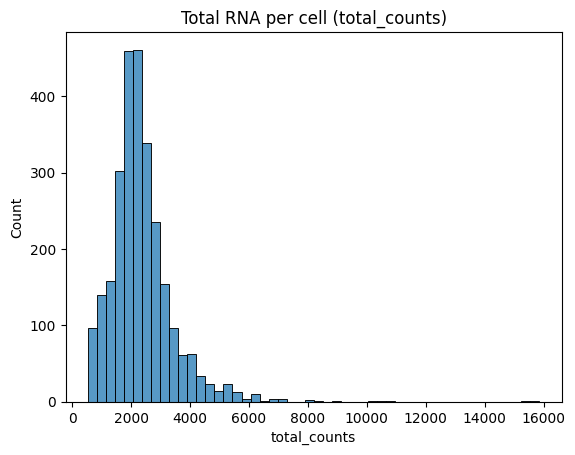

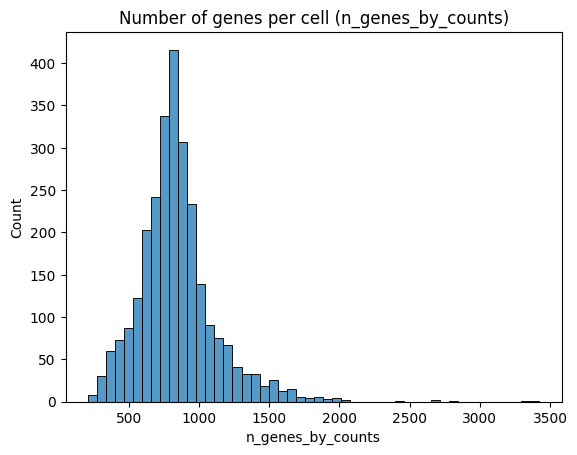

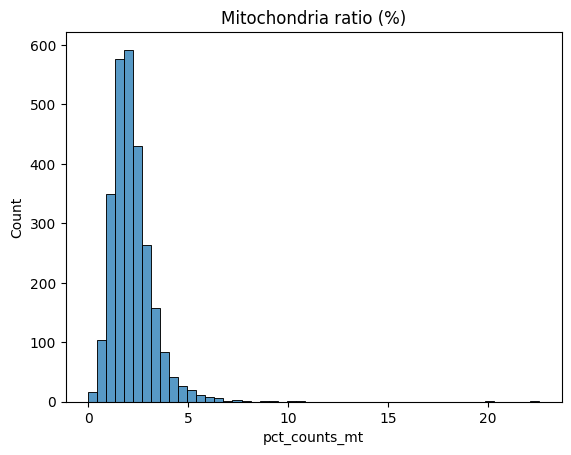

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total RNA
sns.histplot(adata.obs["total_counts"], bins=50)
plt.title("Total RNA per cell (total_counts)")
plt.show()

# The number of genes
sns.histplot(adata.obs["n_genes_by_counts"], bins=50)
plt.title("Number of genes per cell (n_genes_by_counts)")
plt.show()

# Mitochondria ratio
sns.histplot(adata.obs["pct_counts_mt"], bins=50)
plt.title("Mitochondria ratio (%)")
plt.show()


In [8]:
print("Number of cell before filtering:", adata.n_obs)


Number of cell before filtering: 2700


In [9]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
print("Number of cell after filtering:", adata.n_obs)

Number of cell after filtering: 2638


In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)

print("Normalization done.")
print(" Total RNA in sample cell (all must be ~10.000):")
print(adata.obs["total_counts"].head())


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Normalization done.
 Total RNA in sample cell (all must be ~10.000):
index
AAACATACAACCAC-1    2421.0
AAACATTGAGCTAC-1    4903.0
AAACATTGATCAGC-1    3149.0
AAACCGTGCTTCCG-1    2639.0
AAACCGTGTATGCG-1     981.0
Name: total_counts, dtype: float32


In [11]:
sc.pp.log1p(adata)

print("Log1p transformation.")



Log1p transformation.


In [12]:
print("ex. expression of 'IL7R' gene in first 5 cell:")
print(adata[:, "IL7R"].X[:5])

ex. expression of 'IL7R' gene in first 5 cell:
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 1)>
  Coords	Values
  (0, 0)	2.59462571144104
  (1, 0)	1.6251410245895386
  (2, 0)	1.4292607307434082


In [13]:
sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5
)

print("Highly variable genes")
print("How many total Highly variable genes have been selected?")
print(adata.var.highly_variable.sum())


Highly variable genes
How many total Highly variable genes have been selected?
2013


In [14]:
print(" The first 10 highly variable gene as an example:")
print(adata.var[adata.var.highly_variable].head(10).index.tolist())


 The first 10 highly variable gene as an example:
['TNFRSF4', 'CPSF3L', 'ATAD3C', 'C1orf86', 'RER1', 'TNFRSF25', 'NOL9', 'TNFRSF9', 'CTNNBIP1', 'SRM']


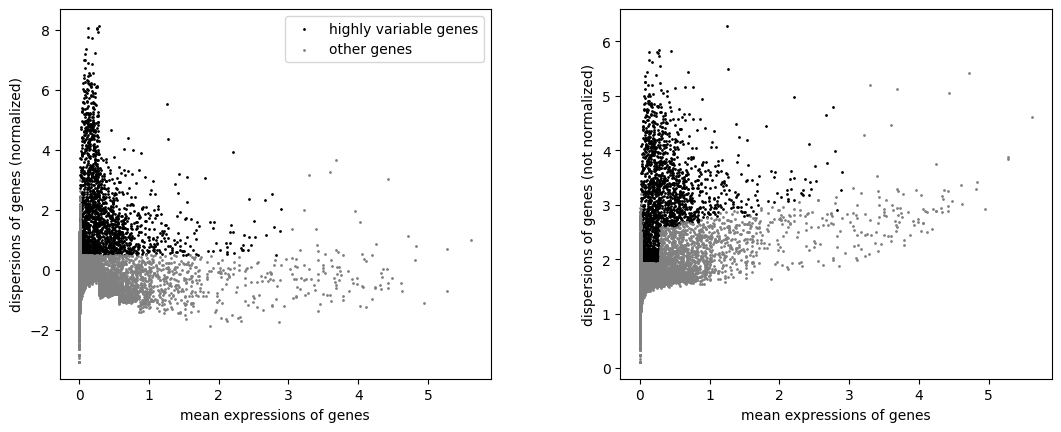

In [15]:
sc.pl.highly_variable_genes(adata)


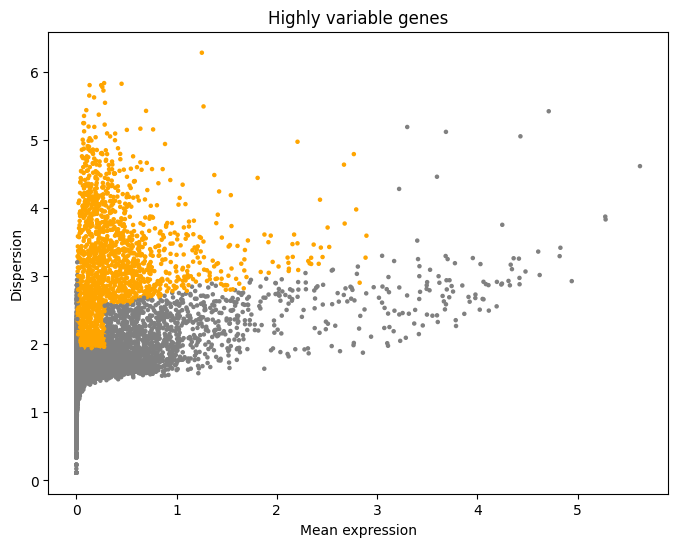

In [16]:
import numpy as np
import matplotlib.pyplot as plt

hvgs = adata.var["highly_variable"].values  # numpy array
colors = np.where(hvgs, "orange", "gray")   # True → orange, False → gray

plt.figure(figsize=(8, 6))
plt.scatter(adata.var["means"], adata.var["dispersions"],
            c=colors, s=5)
plt.xlabel("Mean expression")
plt.ylabel("Dispersion")
plt.title("Highly variable genes")
plt.show()



In [17]:
hvgs = adata.var["highly_variable"]
print("True  (selected genes):", hvgs.sum())
print("False  (not selected genes):", (~hvgs).sum())


True  (selected genes): 2013
False  (not selected genes): 30725


In [18]:
adata = adata[:, adata.var.highly_variable]
print("Dataset contain only highly variable genes. New dimension:")
print(adata.shape)


Dataset contain only highly variable genes. New dimension:
(2638, 2013)


In [19]:
sc.pp.scale(adata, max_value=10)

print(" Dataset scaled.")


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.11/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


 Dataset scaled.


In [20]:
sc.tl.pca(adata, svd_solver='arpack')

print("✅ PCA done. The first 5 components :")
print(adata.obsm["X_pca"][:5])  # PCA result of each cell


✅ PCA done. The first 5 components :
[[-4.332465    0.5382656   0.3949373  -2.282728   -0.8528977   0.47110832
   0.7659043  -0.8761772  -3.7391713   0.3661029  -2.5578036  -0.44123256
   1.3369915  -1.5548602  -0.2859224  -1.4898006  -2.2652247  -1.0821159
   3.3841863  -2.307357   -3.3845453   1.3248729   2.793943    2.0739133
   1.4679213  -1.6084424  -0.9536933   1.3667167   1.3283944  -2.6707861
  -0.32051662  0.32735413  0.37075943 -1.5777627  -1.0861309  -0.9068609
   0.98374474  1.2575102  -0.03937075 -0.07223467 -0.57479036  2.1385064
  -0.4373901   1.4630345  -1.4563521  -0.9554909   1.233192    1.4094808
  -1.0376478   2.3584316 ]
 [-0.43139926 -5.6274767  -2.222329    8.788919   -2.7101254  -2.3408852
   1.6153678   1.2793349  -1.8939493  -0.305207    0.5112574  -0.65643007
   3.8894932  -1.4551555   1.9058454   0.29681566 -1.9464828   1.2811885
   4.0655823   0.67134166 -1.8842422   0.028314   -2.9987018   0.0254165
  -1.3796046   3.357324    0.70995533 -0.05198263  1.2755

In [21]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

print(" Neighbors matrix oluşturuldu.")
#n_neighbors=10: look at 10 nearest cells for each cell.

#n_pcs=40: Use the first 40 component in PCA because they carry the most variance

 Neighbors matrix oluşturuldu.


In [22]:
sc.tl.umap(adata)

print("UMAP coordination calculated")
print("UMAP for the first 5 cell")
print(adata.obsm["X_umap"][:5])


UMAP coordination calculated
UMAP for the first 5 cell
[[ 1.4952601   6.4334416 ]
 [-0.68541527 11.733742  ]
 [ 0.9699819   4.0885196 ]
 [15.276722    4.258974  ]
 [ 5.511149    3.2065756 ]]


In [ ]:
pip install leidenalg

In [24]:
sc.tl.leiden(adata, resolution=0.5)

print("Leiden clustering")
print("Labels of the first 10 cell")
print(adata.obs["leiden"].head(10))


/tmp/ipython-input-24-711359020.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


Leiden clustering
Labels of the first 10 cell
index
AAACATACAACCAC-1    0
AAACATTGAGCTAC-1    3
AAACATTGATCAGC-1    0
AAACCGTGCTTCCG-1    1
AAACCGTGTATGCG-1    2
AAACGCACTGGTAC-1    0
AAACGCTGACCAGT-1    0
AAACGCTGGTTCTT-1    2
AAACGCTGTAGCCA-1    0
AAACGCTGTTTCTG-1    1
Name: leiden, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']


resolution=0.5 → affect the cluster number:

less resolution → less cluster

high resoltion → high cluster

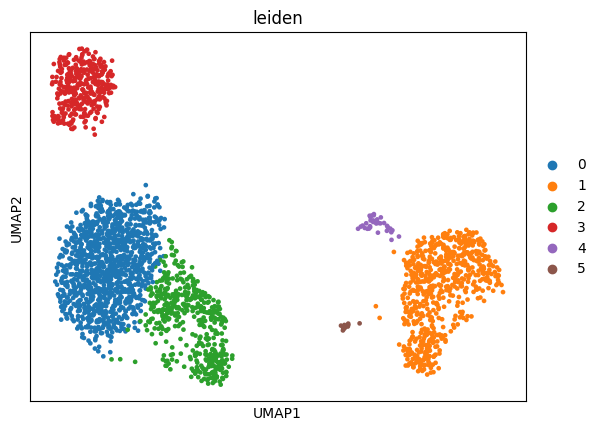

In [25]:
sc.pl.umap(adata, color='leiden')


Each dots represent the one cell

Colors: represent the Leiden cluster

Those of the same color can be from the same cell subtype.

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test')

print("Marker genes calculated.")


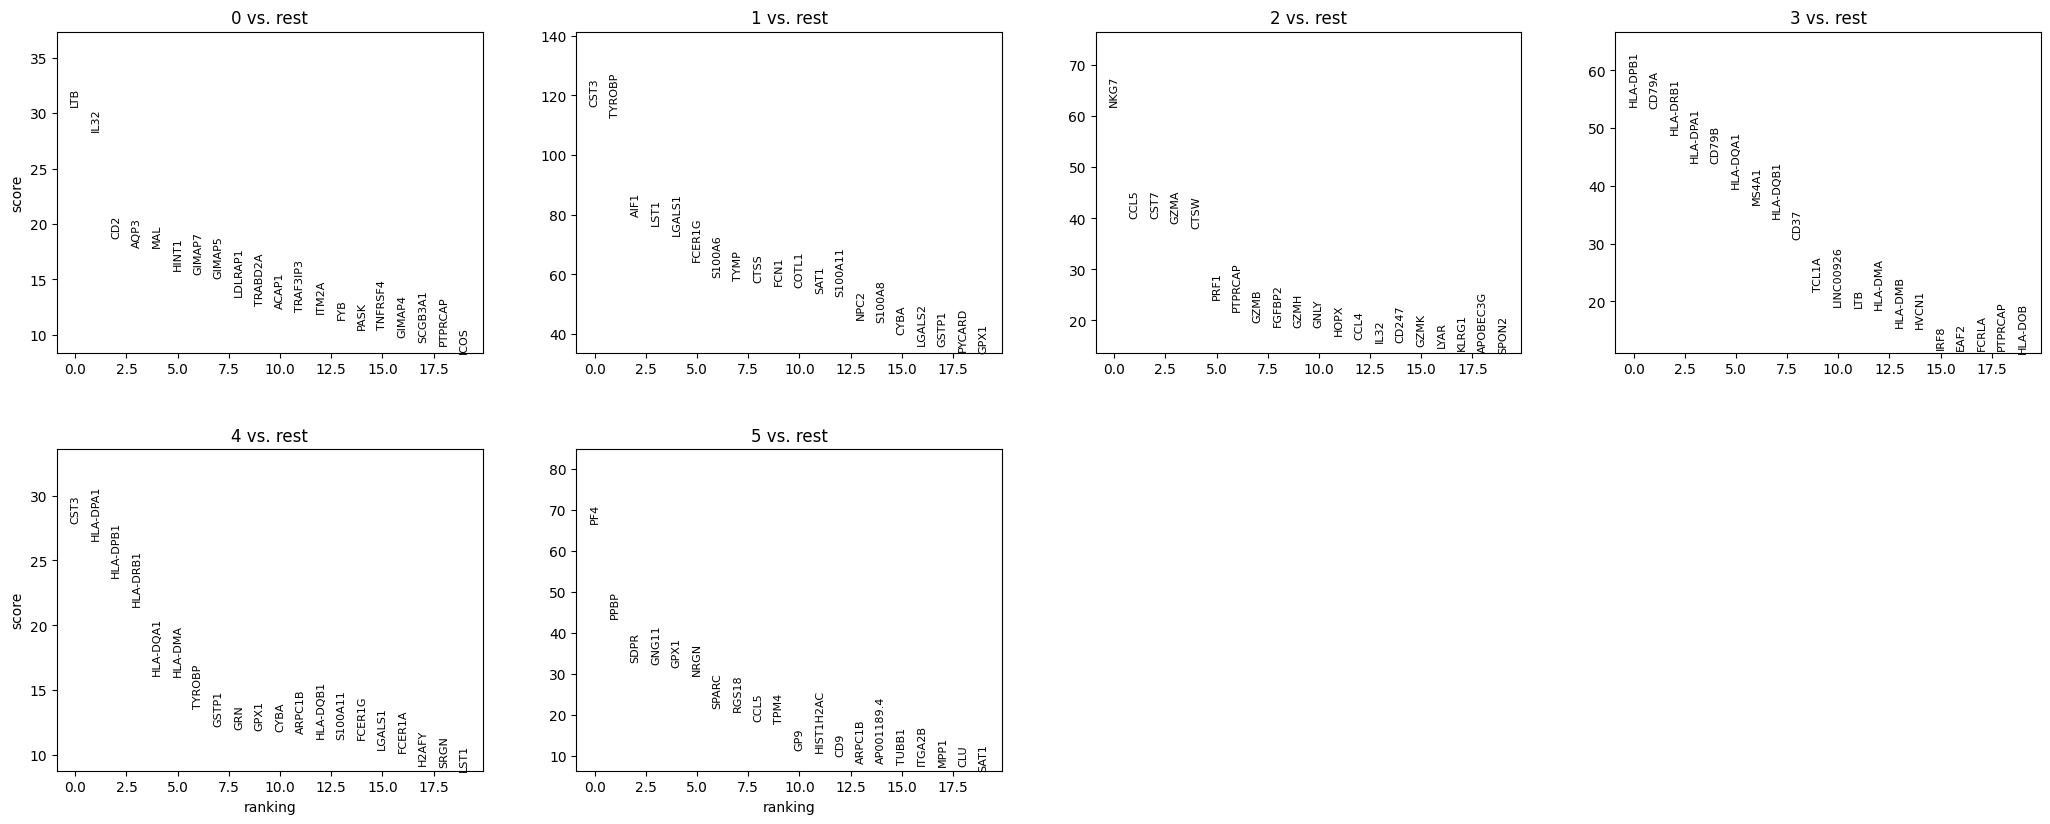

In [27]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)


Shows the most meaningful different expression of 20 gene for each cluster

X axis: cluster (leiden 0, 1, 2…)

Y axis: ordered gene by log fold-change or p-value

In [28]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

print("The first 3 marker genes for each cluster:")
for group in groups:
    print(f"Cluster {group}: {result['names'][group][:3]}")


The first 3 marker genes for each cluster:
Cluster 0: ['LTB' 'IL32' 'CD2']
Cluster 1: ['CST3' 'TYROBP' 'AIF1']
Cluster 2: ['NKG7' 'CCL5' 'CST7']
Cluster 3: ['HLA-DPB1' 'CD79A' 'HLA-DRB1']
Cluster 4: ['CST3' 'HLA-DPA1' 'HLA-DPB1']
Cluster 5: ['PF4' 'PPBP' 'SDPR']


In [29]:
import pandas as pd

marker_df = pd.DataFrame({
    group + '_' + key: result[key][group]
    for group in result['names'].dtype.names
    for key in ['names', 'pvals', 'logfoldchanges']
})

marker_df.to_csv("marker_genler_pbmc3k.csv")
print("Marker genes were saved to csv.")


Marker genes were saved to csv.


In [30]:
cluster_names = {
    '0': 'Naive/Memory T cells',
    '1': 'Monocytes',
    '2': 'NK cells',
    '3': 'B cells',
    '4': 'Dendritic cells',
    '5': 'Megakaryocytes'
}

adata.obs['cell_type'] = adata.obs['leiden'].map(cluster_names)

print(" New labelles were added. First 10 cell:")
print(adata.obs[['leiden', 'cell_type']].head(10))


 New labelles were added. First 10 cell:
                 leiden             cell_type
index                                        
AAACATACAACCAC-1      0  Naive/Memory T cells
AAACATTGAGCTAC-1      3               B cells
AAACATTGATCAGC-1      0  Naive/Memory T cells
AAACCGTGCTTCCG-1      1             Monocytes
AAACCGTGTATGCG-1      2              NK cells
AAACGCACTGGTAC-1      0  Naive/Memory T cells
AAACGCTGACCAGT-1      0  Naive/Memory T cells
AAACGCTGGTTCTT-1      2              NK cells
AAACGCTGTAGCCA-1      0  Naive/Memory T cells
AAACGCTGTTTCTG-1      1             Monocytes


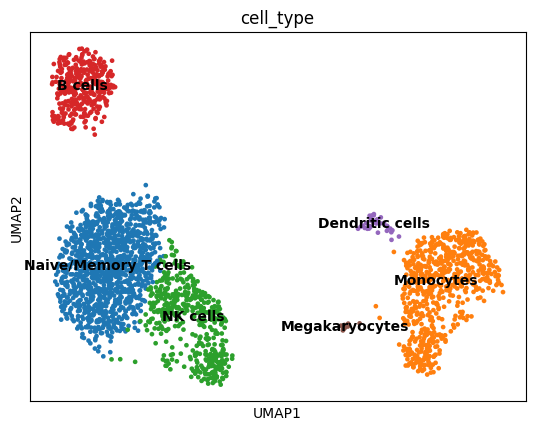

In [31]:
sc.pl.umap(adata, color='cell_type', legend_loc='on data')


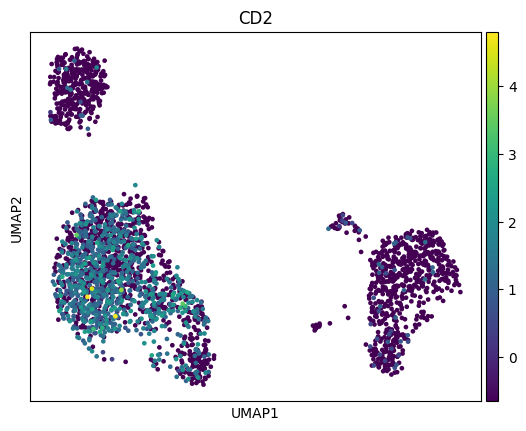

In [32]:
sc.pl.umap(adata, color=['CD2'])

In [33]:
genes_of_interest = [
    'MS4A1',    # B cells
    'CD79A',    # B cells
    'NKG7',     # NK cells
    'GNLY',     # NK cells
    'LTB',      # T Cell
    'PF4',     # Megakaryocytes
    'PPBP',     # Megakaryocytes
    'FCER1A'    # DCs
]

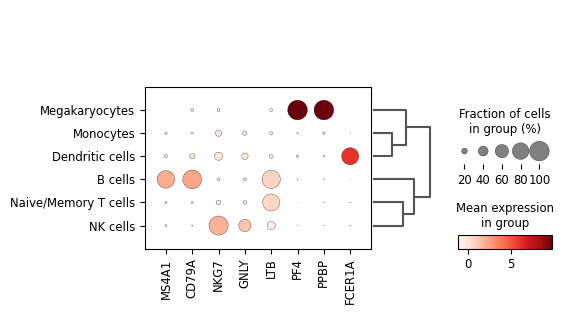

In [34]:
sc.pl.dotplot(adata, genes_of_interest, groupby='cell_type', dendrogram=True)

Color shade: average gene expression

Size of the dot: how many cell are expressed this gene  

Dendrogram: cell types are grouped by automatically

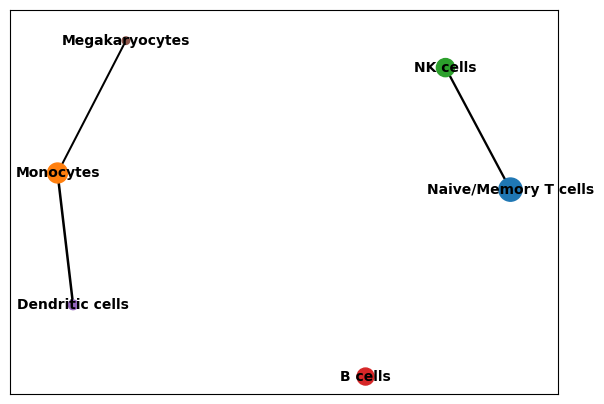

In [35]:
sc.tl.paga(adata, groups='cell_type')
sc.pl.paga(adata, threshold=0.1, show=True)

In this step, we will model how cells progress through a developmental process (trajectory).
Scanpy does this using PAGA and DPT (Diffusion Pseudotime).
The above graph shows the transition probabilities between cell types.

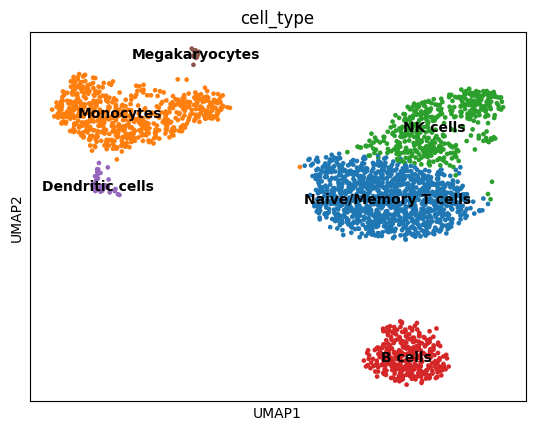

In [36]:
sc.tl.umap(adata, init_pos='paga')
sc.pl.umap(adata, color='cell_type', legend_loc='on data')
#Paga graph gives UMAP more accurately → The transition direction of cells looks more meaningful.

#Check out the Pseudotime
DPT does not work without this step. Unlike PCA, it is suitable for modeling cell transitions.


In [37]:
sc.tl.diffmap(adata)

This is the cell in which the cellular journey begins. It usually becomes progenitor or naive t cell.



In [38]:
# Took a cell from 'Naive/Memory T cells' cluster
root_cell = adata.obs[adata.obs['cell_type'] == 'Naive/Memory T cells'].index[0]


In [39]:
adata.uns['iroot'] = adata.obs_names.get_loc(root_cell)
sc.tl.dpt(adata)


adata.uns ['iroot']: gives the "starting point" to the DPT algorithm.

get_loc () → gives the sequence of the cell (eg 154. Cell)



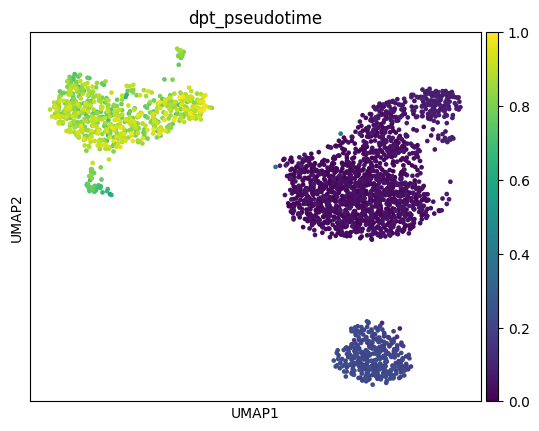

In [40]:
sc.pl.umap(adata, color='dpt_pseudotime')
#This graph shows the positions of the cells in the development process on 0 → 1 scale
#Light color → Early stage, dark color → late stage

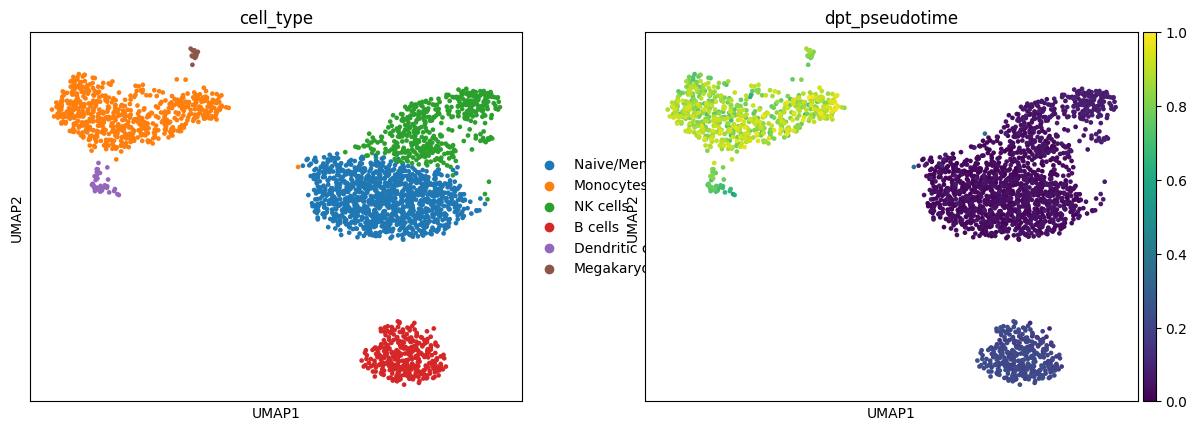

In [41]:
sc.pl.umap(adata, color=['cell_type', 'dpt_pseudotime'], cmap='viridis')
#You can see both cell types and pseudotime flow at the same time.

#Pseudotime Heatmap (Expression, etc. temporal flow)

Let's see how gene expressions change along pseudotime with Heatmap

In [42]:
import pandas as pd
from scipy.stats import spearmanr
import numpy as np

# Spearman correlation for each cell
gene_corr = []
for gene in adata.var_names:
    try:
        r, _ = spearmanr(adata[:, gene].X.toarray().flatten(), adata.obs['dpt_pseudotime'])
        gene_corr.append((gene, r))
    except:
        pass

# Take the 50 genes of highest correlation
top_genes = sorted(gene_corr, key=lambda x: abs(x[1]), reverse=True)[:50]
top_gene_names = [g[0] for g in top_genes]


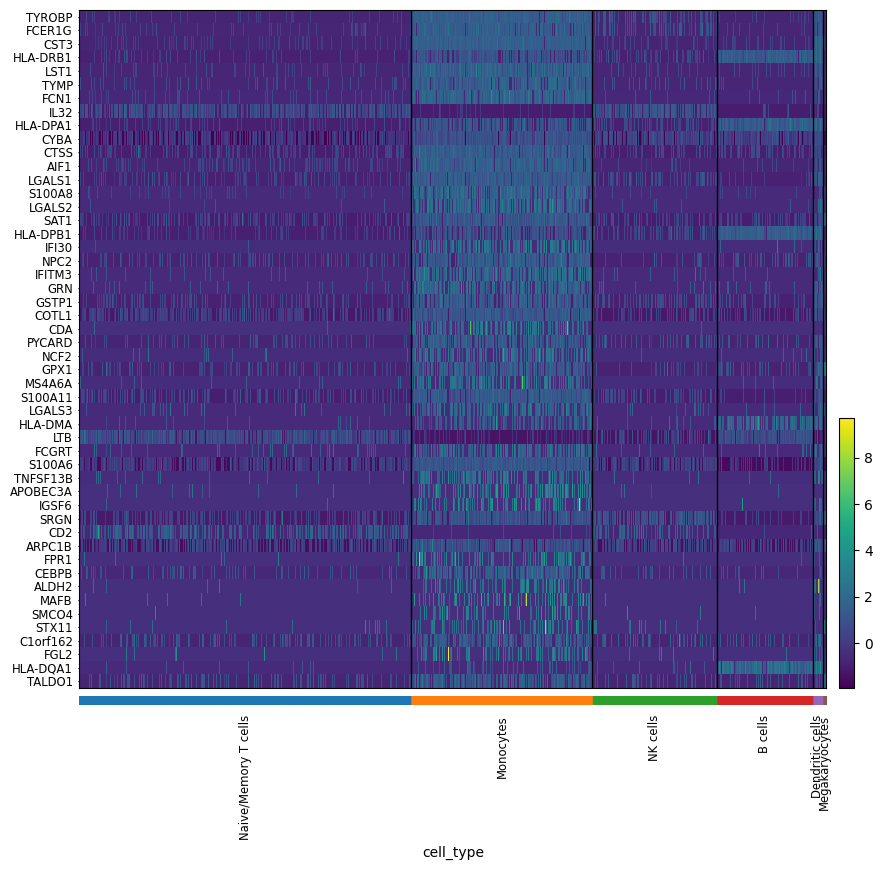

In [43]:
sc.pl.heatmap(
    adata,
    var_names=top_gene_names,
    groupby='cell_type',
    use_raw=False,
    swap_axes=True,
    show=True
)


#Trajectory- PAGA & pseudotime

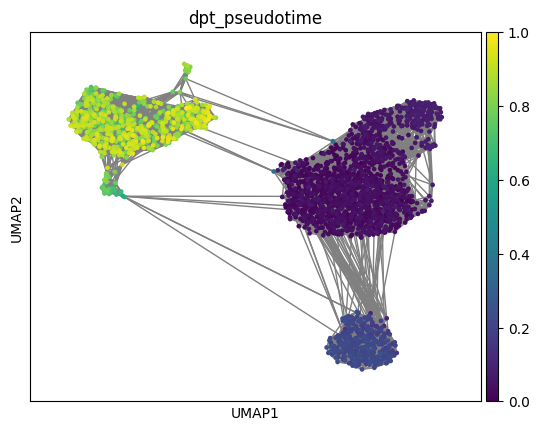

In [44]:
sc.pl.umap(adata, color='dpt_pseudotime', edges=True, edges_width=1, edges_color='gray')

Trajectory is now visible

#Pathway Enrichment (Gene Set Analysis)

Now let's find out which biological ways are activated with genes that change along pseudotime.
For this, we will perform an outward transfer + Gsea analysis.

In [45]:
# Most Increasing Genes According to Correlation
df = pd.DataFrame(top_genes, columns=["gene", "correlation"])
df.to_csv("pseudotime_genes_ranked.csv", index=False)
print("Genes list are saved")


Genes list are saved


You can use this file in a tool like Gsea (G: Profiler, Enrichr, Webgestalt, David ...).

#Alternative: Pathway Enrichment through Python (Gseapy)
---




In [ ]:
pip install gseapy

In [47]:
import gseapy as gp

genes = [g[0] for g in top_genes if g[1] > 0]  # only positive correlation
enr = gp.enrichr(gene_list=genes,
                 gene_sets='KEGG_2021_Human',
                 outdir='gsea_results',
                 cutoff=0.05)

enr.results.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Asthma,6/31,8.515579e-11,7.919488e-09,0,0,116.651707,2704.749333,HLA-DMA;FCER1G;HLA-DPB1;HLA-DQA1;HLA-DRB1;HLA-...
1,KEGG_2021_Human,Leishmaniasis,7/77,5.271780e-10,1.792232e-08,0,0,49.707500,1061.925329,HLA-DMA;NCF2;HLA-DPB1;CYBA;HLA-DRB1;HLA-DQA1;H...
2,KEGG_2021_Human,Antigen processing and presentation,7/78,5.781393e-10,1.792232e-08,0,0,49.004930,1042.393966,HLA-DMA;HLA-DPB1;IFI30;HLA-DRB1;CTSS;HLA-DQA1;...
3,KEGG_2021_Human,Intestinal immune network for IgA production,6/48,1.377534e-09,3.202767e-08,0,0,69.376307,1415.482755,HLA-DMA;HLA-DPB1;HLA-DRB1;HLA-DQA1;TNFSF13B;HL...
4,KEGG_2021_Human,Phagosome,8/152,2.262190e-09,4.207673e-08,0,0,28.217949,561.732800,HLA-DMA;NCF2;HLA-DPB1;CYBA;HLA-DRB1;CTSS;HLA-D...


Analysis above:

Which roads are active → eg. "T Cell Recedor Signaling"

Which biological functions are changing → “Apoptosis”, “Cytokine Signaling”

#Cell Type Specific Tragectory (Development Way)

In [48]:
# Select the 'Monocytes' in cell type column
mono = adata[adata.obs['cell_type'] == 'Monocytes'].copy()

print(" The number Monocyte cell:", mono.shape[0])


 The number Monocyte cell: 640


Repeat the preparation for Trajectory (Monocytes only)

In [49]:
# PCA
sc.pp.pca(mono)
sc.pp.neighbors(mono)
sc.tl.diffmap(mono)

# Select the Root cell (If desired, as the first cell)
root_cell = mono.obs_names[0]
mono.uns['iroot'] = mono.obs_names.get_loc(root_cell)

# Pseudotime
sc.tl.dpt(mono)


 Pseudotime UMAP and Heatmap


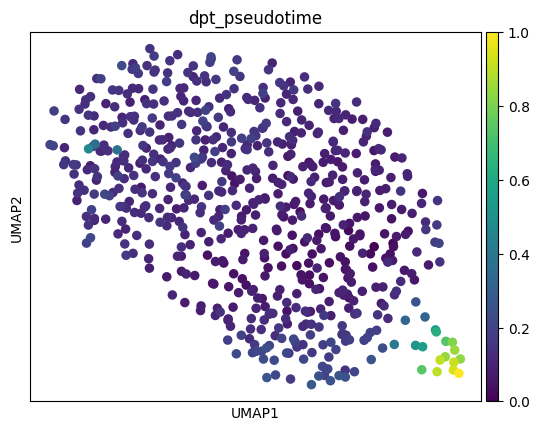

In [50]:
# Pseudotime UMAP ve Heatmap

# init_pos = we use 'PCA' instead of 'paga' because Mono contains only one cell type
sc.tl.umap(mono, init_pos='pca')
sc.pl.umap(mono, color='dpt_pseudotime', cmap='viridis')

#Find genes that vary according to Pseudotime

/tmp/ipython-input-51-583285789.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = spearmanr(mono[:, gene].X.toarray().flatten(), mono.obs['dpt_pseudotime'])


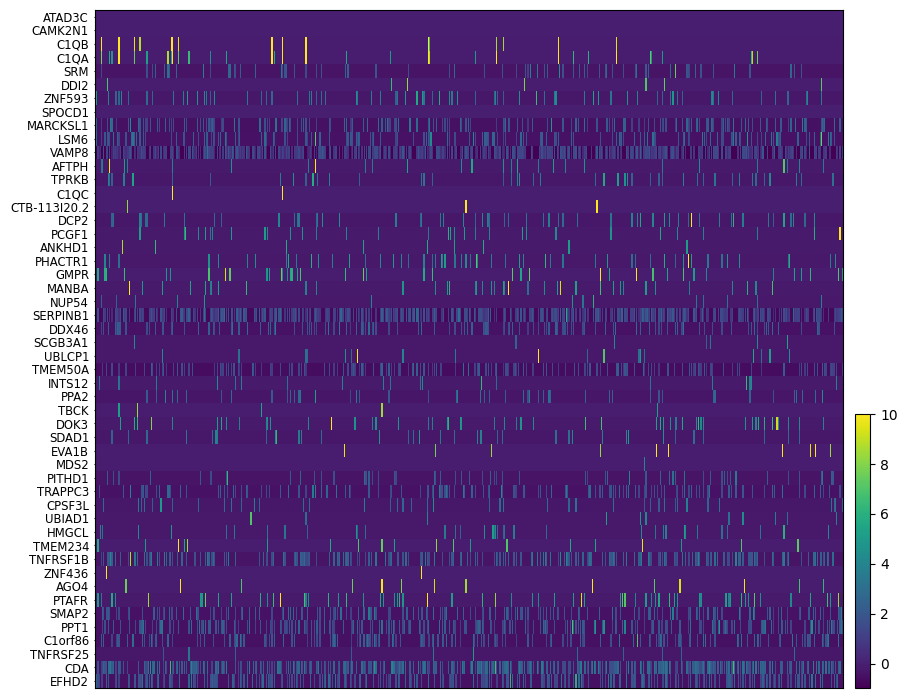

In [51]:
# Sorted by correlation
from scipy.stats import spearmanr
gene_corr = []
for gene in mono.var_names:
    try:
        r, _ = spearmanr(mono[:, gene].X.toarray().flatten(), mono.obs['dpt_pseudotime'])
        gene_corr.append((gene, r))
    except:
        continue

top_genes = sorted(gene_corr, key=lambda x: abs(x[1]), reverse=True)[:50]
top_gene_names = [g[0] for g in top_genes]

# Remove sort_order=True which caused the AttributeError
sc.pl.heatmap(mono, var_names=top_gene_names, use_raw=False, swap_axes=True, groupby='cell_type')

# Optional: Pathway Analysis (Monocytes only)
---



In the same way, we can take these top genes with the above Gseapy and can only analyze KEG or GO Pathway for this type of cell type.

In [52]:
from gseapy import enrichr

genes = [g[0] for g in top_genes if g[1] > 0]
enr = enrichr(gene_list=genes,
              gene_sets='GO_Biological_Process_2021',
              organism='Human',
              outdir='mono_pathways',
              cutoff=0.05)

enr.results.head(10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,cell junction disassembly (GO:0150146),3/6,3.441498e-08,0.000007,0,0,907.818182,15600.650114,C1QB;C1QA;C1QC
1,GO_Biological_Process_2021,synapse pruning (GO:0098883),3/9,1.441887e-07,0.000009,0,0,453.840909,7148.966951,C1QB;C1QA;C1QC
2,GO_Biological_Process_2021,"complement activation, classical pathway (GO:0...",3/9,1.441887e-07,0.000009,0,0,453.840909,7148.966951,C1QB;C1QA;C1QC
3,GO_Biological_Process_2021,humoral immune response mediated by circulatin...,3/11,2.827634e-07,0.000014,0,0,340.346591,5131.968945,C1QB;C1QA;C1QC
4,GO_Biological_Process_2021,regulation of complement activation (GO:0030449),3/50,3.252704e-05,0.001143,0,0,57.818182,597.460644,C1QB;C1QA;C1QC
5,GO_Biological_Process_2021,regulation of immune effector process (GO:0002...,3/53,3.878043e-05,0.001143,0,0,54.340909,551.972931,C1QB;C1QA;C1QC
6,GO_Biological_Process_2021,regulation of humoral immune response (GO:0002...,3/54,4.102780e-05,0.001143,0,0,53.272727,538.121701,C1QB;C1QA;C1QC
7,GO_Biological_Process_2021,synapse organization (GO:0050808),3/126,5.073882e-04,0.012368,0,0,22.008869,166.964434,C1QB;C1QA;C1QC
8,GO_Biological_Process_2021,regulation of neuron death (GO:1901214),2/86,5.141394e-03,0.075107,0,0,20.591097,108.523957,C1QA;TNFRSF1B
9,GO_Biological_Process_2021,negative regulation of RNA polymerase II regul...,1/5,6.234939e-03,0.075107,0,0,208.031250,1056.296661,ZNF593
